In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Data/Real-Data/Real_Combine.csv')

df = df.dropna()

X = df.iloc[:,:-1]  ##Independent Features,
Y = df.iloc[:,-1] ##Dependent Features, 

###  ##############################################################  extra trees Regressor #######################################################

In [2]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,Y)

ExtraTreesRegressor()

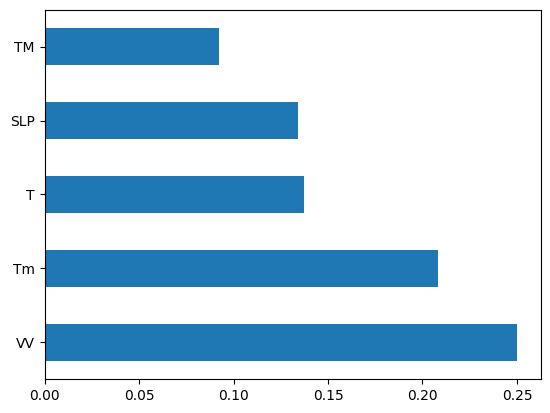

In [3]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

####   #########################################################  Linear Regression ##################################################

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
lin_regressor = LinearRegression()
mse = cross_val_score(lin_regressor,X,Y,scoring='neg_mean_squared_error',cv=5)
mean_mse=np.mean(mse)
print(mean_mse)

-3499.356187290208


####  ########################################################### Ridge Regression ##################################################

In [6]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,Y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

#### ############################################################ Lasso Regression ############################################################

In [7]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X,Y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 5}
-3356.4102569706833


d:\Air-Quality-Prediction-main\.conda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.008e+05, tolerance: 4.247e+02
  model = cd_fast.enet_coordinate_descent(
d:\Air-Quality-Prediction-main\.conda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.110e+05, tolerance: 3.871e+02
  model = cd_fast.enet_coordinate_descent(
d:\Air-Quality-Prediction-main\.conda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

-------------------------------------------------->>>>>>>>>>   Model evaluation  <<<<<<<<<<<---------------------------------------------------

Linear Regresion : -3499.356187290208
Ridge Regression : -3354.6171573071247
Lass Regression  : -3356.4102569706833


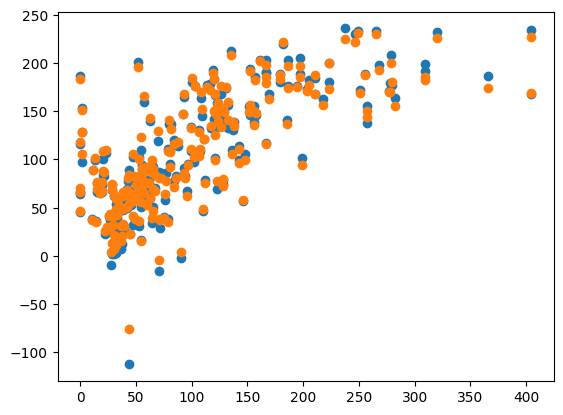

In [8]:
print("Linear Regresion :" ,mean_mse)
print("Ridge Regression :", ridge_regressor.best_score_)
print("Lass Regression  :",lasso_regressor.best_score_)

prediction = ridge_regressor.predict(X_test)
plt.scatter(Y_test,prediction)

prediction = lasso_regressor.predict(X_test)
plt.scatter(Y_test,prediction)

In [9]:
from sklearn import metrics

print('Lasso Regression MAE:', metrics.mean_absolute_error(Y_test, prediction))
print('Lasso Regression MSE:', metrics.mean_squared_error(Y_test, prediction))
print('Lasso Regression RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, prediction)))

print('Ridge Regression MAE:', metrics.mean_absolute_error(Y_test, prediction))
print('Ridge Regression MSE:', metrics.mean_squared_error(Y_test, prediction))
print('Ridge Regression RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, prediction)))

import pickle
file = open('ridge_regression_model.pkl', 'wb')
pickle.dump(lasso_regressor, file)

Lasso Regression MAE: 40.15696946997222
Lasso Regression MSE: 3103.265102660339
Lasso Regression RMSE: 55.70695739905689
Ridge Regression MAE: 40.15696946997222
Ridge Regression MSE: 3103.265102660339
Ridge Regression RMSE: 55.70695739905689
